# WARNING


Este script es computacionalmente intensivo. Se leen, guardan, cargan y procesan archivos xlsx con un gran numero de variables. Además de realizar la regresión.

Como disclaimer: se proporciona esta URL a google drive para descargarse el repositorio, el cual contiene un paquete para instalar las librerías con poetry y está todo más organizado. (Con reports del EDA en formato HTML):https://drive.google.com/file/d/1JLTm3bd8btuQAkVhXTI658ZhagdBpTto/view?usp=sharing

No se realizan muchas explicaciones de los procesos ni las variables. Para ello se tiene el script_exploración, el cual es una versión de este pero con el EDA y otros procesos no aplicados en la solución final


**Para ejecutar este archivo deberás tener la estructura de los ficheros de esta forma (¡tal cual en el drive!):**

raíz/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; processed/ <- aquí apareceran tanto las predicciones como dataframes y archivos intermedios

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; raw/ <- aquí irán los ficheros xlsx del reto


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;losca/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;notebooks/ <- aquí deberá de estar este fichero

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(este fichero)

**Además requerirás de las siguientes librerías:**

python = "^3.11, <3.13"

torch = "^2.4.0"

scikit-learn = "^1.5.1"

optuna = "^3.6.1"

pandas = "^2.2.2"

matplotlib = "^3.9.2"

openpyxl = "^3.1.5"

ydata-profiling = "^4.10.0"

lazypredict-nightly = "^0.3.2"

lime = "^0.2.0.1"

shap = "^0.46.0"


# Joining biorreactores data into a single file

In [1]:
import os
import pandas as pd
import numpy as np

# Ruta de la carpeta que contiene los archivos Excel
folder_path = '../../data/raw/'

# Lista para almacenar los dataframes
dfs = []

# Iterar sobre los archivos en la carpeta
print("Iniciando lectura de archivos...")
for filename in os.listdir(folder_path):
    # Verificar si el archivo es un archivo Excel de un biorreactor y no acaba con ":Zone.Identifier"
    if filename.startswith("Biorreactor") and filename.endswith(".xlsx") and not filename.endswith(":Zone.Identifier"):
        print(f"Leyendo archivo {filename}...")
        # Leer el archivo Excel
        print("Leyendo archivo...")
        df = pd.read_excel(os.path.join(folder_path, filename), sheet_name="Datos")
        
        # Extraer el número del biorreactor del nombre del archivo
        print("Extrayendo número del biorreactor...")
        num_biorreactor = filename.split()[1].split('.')[0]
        
        # Añadir la columna "Num_biorreactor"
        print("Añadiendo columna 'Num_biorreactor'...")
        df['Num_biorreactor'] = float(num_biorreactor)
        
        # Renombrar columnas para quitar el "XXXXX_" del principio
        print("Renombrando columnas...")
        df.columns = ("DateTime", "Agitation_PV",	"Air_Sparge_PV", "Biocontainer_Pressure_PV", "DO_1_PV", "DO_2_PV",	"Gas_Overlay_PV", "Load_Cell_Net_PV", 
                          "pH_1_PV", "pH_2_PV",  "PUMP_1_PV","PUMP_1_TOTAL", "PUMP_2_PV", "PUMP_2_TOTAL", "Single_Use_DO_PV", "Single_Use_pH_PV", "Temperatura_PV", "Num_Biorreactor")
        
        # Añadir el dataframe a la lista
        print("Añadiendo dataframe a la lista...")
        dfs.append(df)

# Concatenar todos los dataframes en uno solo (uniendo filas)
print("Concatenando dataframes...")
df_total = pd.concat(dfs, ignore_index=True)

# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Biorreactor_Total.xlsx', index=False)

Iniciando lectura de archivos...
Leyendo archivo Biorreactor 14614.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 13171.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 14615.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 13172.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 14618.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la l

In [2]:
#print row with missing values

print(df_total[df_total.isnull().any(axis=1)])

                       DateTime  Agitation_PV  Air_Sparge_PV  \
12238   2023-07-20 12:30:00.000           NaN            NaN   
12239   2023-07-20 12:45:00.000           NaN            NaN   
12240   2023-07-20 13:00:00.000           NaN            NaN   
12241   2023-07-20 13:15:00.000           NaN            NaN   
12242   2023-07-20 13:30:00.000           NaN            NaN   
...                         ...           ...            ...   
470308  2024-08-27 08:00:00.000           NaN            NaN   
470309  2024-08-27 08:15:00.000           NaN            NaN   
470310  2024-08-27 08:30:00.000           NaN            NaN   
470311  2024-08-27 08:45:00.000           NaN            NaN   
470312  2024-08-27 09:00:00.000           NaN            NaN   

        Biocontainer_Pressure_PV  DO_1_PV  DO_2_PV  Gas_Overlay_PV  \
12238                        NaN      NaN      NaN             NaN   
12239                        NaN      NaN      NaN             NaN   
12240                

In [3]:
# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Biorreactor_Total.xlsx', index=False)

Guardando archivo Excel...


In [4]:
df_total

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
0,2023-03-15 00:00:00.000,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.880000,0.0,191.200293,799.991992,799.967969,30.216161,14614.0
1,2023-03-15 00:15:00.000,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,30.135999,14614.0
2,2023-03-15 00:30:00.000,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.823988,14614.0
3,2023-03-15 00:45:00.000,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.408039,14614.0
4,2023-03-15 01:00:00.000,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.191720,14614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471712,2024-09-10 23:00:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.268666,14616.0
471713,2024-09-10 23:15:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.216003,14616.0
471714,2024-09-10 23:30:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.169230,14616.0
471715,2024-09-10 23:45:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.171162,14616.0


In [5]:
#Tipo de dato de cada columna
print("Tipo de dato de cada columna:")
print(df_total.dtypes)


Tipo de dato de cada columna:
DateTime                     object
Agitation_PV                float64
Air_Sparge_PV               float64
Biocontainer_Pressure_PV    float64
DO_1_PV                     float64
DO_2_PV                     float64
Gas_Overlay_PV              float64
Load_Cell_Net_PV            float64
pH_1_PV                     float64
pH_2_PV                     float64
PUMP_1_PV                   float64
PUMP_1_TOTAL                float64
PUMP_2_PV                   float64
PUMP_2_TOTAL                float64
Single_Use_DO_PV            float64
Single_Use_pH_PV            float64
Temperatura_PV              float64
Num_Biorreactor             float64
dtype: object


# Biorreactores: anomalies detection and analysis

In [6]:
import pandas as pd

In [7]:
bt = pd.read_excel('../../data/processed/Biorreactor_Total.xlsx')

In [8]:
bt.to_csv('../../data/processed/Biorreactor_Total.csv', index=False)

# Types and checks of biorreactor data

In [9]:
import pandas as pd


In [10]:
# Load Biorreactor_Total.csv
bt = pd.read_csv('../../data/processed/Biorreactor_Total.csv')
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

In [11]:
#Change name of columns
bt.columns = ("f_h_bt", "vel_agitacion_bt", "aire_sparger_bt", "pres_bio_bt", "pres_par_O2_1_bt", "pres_par_O2_2_bt", "aire_cupula_bt", "peso_bt", "ph_1_bt", "ph_2_bt", "antiespumante_bt", "total_antiespumante_bt", "sol_base_bt", "total_sol_base_bt", "pres_parcial_O2_bt", "ph_cultivo_bt", "temp_bt", "id_bio")


In [12]:
# To datetime format from Madrid and convert to UTC
bt['f_h_bt'] = pd.to_datetime(bt['f_h_bt'])
bt['f_h_bt'] = bt['f_h_bt'].dt.tz_localize('Europe/Madrid',ambiguous='infer').dt.tz_convert('UTC')

# To UTC

In [13]:
# id_bio to string
bt['id_bio'] = bt['id_bio'].astype(str)

In [14]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   f_h_bt                  471717 non-null  datetime64[ns, UTC]
 1   vel_agitacion_bt        431877 non-null  float64            
 2   aire_sparger_bt         431877 non-null  float64            
 3   pres_bio_bt             431890 non-null  float64            
 4   pres_par_O2_1_bt        384002 non-null  float64            
 5   pres_par_O2_2_bt        245346 non-null  float64            
 6   aire_cupula_bt          431879 non-null  float64            
 7   peso_bt                 431888 non-null  float64            
 8   ph_1_bt                 426758 non-null  float64            
 9   ph_2_bt                 429724 non-null  float64            
 10  antiespumante_bt        431878 non-null  float64            
 11  total_antiespumante_bt  43

In [15]:
bt.head()

,f_h_bt,vel_agitacion_bt,aire_sparger_bt,pres_bio_bt,pres_par_O2_1_bt,pres_par_O2_2_bt,aire_cupula_bt,peso_bt,ph_1_bt,ph_2_bt,antiespumante_bt,total_antiespumante_bt,sol_base_bt,total_sol_base_bt,pres_parcial_O2_bt,ph_cultivo_bt,temp_bt,id_bio
0,2023-03-14 23:00:00+00:00,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.216161,14614
1,2023-03-14 23:15:00+00:00,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.135999,14614
2,2023-03-14 23:30:00+00:00,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.823988,14614
3,2023-03-14 23:45:00+00:00,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.408039,14614
4,2023-03-15 00:00:00+00:00,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.191720,14614


In [16]:
# To pkl
bt.to_pickle('../../data/processed/biorreactor_total.pkl')

# Joining centrifuga data into a single file

In [17]:
import pandas as pd
import numpy as np
import os

# Ruta de la carpeta que contiene los archivos Excel
folder_path = '../../data/raw'

# Lista para almacenar los dataframes
dfs = []

# Iterar sobre los archivos en la carpeta
print("Iniciando lectura de archivos...")
for filename in os.listdir(folder_path):
    # Verificar si el archivo es un archivo Excel de un biorreactor y no acaba con ":Zone.Identifier"
    if filename.startswith("Centrífuga") and filename.endswith(".xlsx") and not filename.endswith(":Zone.Identifier"):
        print(f"Leyendo archivo {filename}...")
        # Leer el archivo Excel
        print("Leyendo archivo...")
        df = pd.read_excel(os.path.join(folder_path, filename), sheet_name="Datos")
        
        # Extraer el número del biorreactor del nombre del archivo
        print("Extrayendo número de centrífuga...")
        num_centrifuga = filename.split()[1].split('.')[0]
        
        # Añadir la columna "Num_biorreactor"
        print("Añadiendo columna 'Num_centrífuga'...")
        df['Num_centrifuga'] = float(num_centrifuga)

        #Eliminar "XXXXX_" de los nombres de las columnas (los 5 primeros números)
        print("Eliminando 'XXXXX_' de los nombres de las columnas...")
        df.columns = df.columns.str.replace(r'^\d{5}_', '', regex=True)
        
        # Reordenar columnas de tal manera: Datetime, EN_parcial, EN_total, D01780551.PV, D01906041.PV, D01916047.PV, D01916503.PV, D01919022.PV, Num_centrifuga
        print("Reordenando columnas...")
        df = df[['DateTime', 'CTF0101.EN_Parcial', 'CTF0101.EN_Total', 'D01780551.PV', 'D01906041.PV', 'D01916047.PV', 'D01916503.PV', 'D01919022.PV', 'Num_centrifuga']]

        #Renombrar columnas
        print("Renombrando columnas...")
        df.columns = ['DateTime', 'EN_parcial', 'EN_total', 'Apertura valvula agua', 'Caudal', 'Contrapresion', 'Presion agua', 'Velocidad separacion', 'Num_centrifuga']
        
        # Añadir el dataframe a la lista
        print("Añadiendo dataframe a la lista...")
        dfs.append(df)

# Concatenar todos los dataframes en uno solo (uniendo filas)
print("Concatenando dataframes...")
df_total = pd.concat(dfs, ignore_index=True)

# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Centrifuga_Total.xlsx', index=False)

Iniciando lectura de archivos...
Leyendo archivo Centrífuga 17825.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Centrífuga 12912.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Centrífuga 14246.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Concatenando dataframes...
Guardando archivo Excel...


In [18]:
#Tipo de dato de cada columna
print("Tipo de dato de cada columna:")
print(df_total.dtypes)


Tipo de dato de cada columna:
DateTime                  object
EN_parcial               float64
EN_total                 float64
Apertura valvula agua    float64
Caudal                   float64
Contrapresion            float64
Presion agua             float64
Velocidad separacion     float64
Num_centrifuga           float64
dtype: object


# Centrifuga: anomalies detection and analysis

In [19]:
import pandas as pd

In [20]:
ct = pd.read_excel('../../data/processed/Centrifuga_Total.xlsx')
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               157239 non-null  object 
 1   EN_parcial             154983 non-null  float64
 2   EN_total               155199 non-null  float64
 3   Apertura valvula agua  156224 non-null  float64
 4   Caudal                 156223 non-null  float64
 5   Contrapresion          156223 non-null  float64
 6   Presion agua           111674 non-null  float64
 7   Velocidad separacion   156224 non-null  float64
 8   Num_centrifuga         157239 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ MB


In [21]:
# Save as csv
ct.to_csv('../../data/processed/Centrifuga_Total.csv', index=False)

# Types and checks of centrifuga data

In [1]:
import pandas as pd

In [2]:
# Read the data from the CSV file
ct = pd.read_csv('../../data/processed/Centrifuga_Total.csv')
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               157239 non-null  object 
 1   EN_parcial             154983 non-null  float64
 2   EN_total               155199 non-null  float64
 3   Apertura valvula agua  156224 non-null  float64
 4   Caudal                 156223 non-null  float64
 5   Contrapresion          156223 non-null  float64
 6   Presion agua           111674 non-null  float64
 7   Velocidad separacion   156224 non-null  float64
 8   Num_centrifuga         157239 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ MB


In [3]:
# Rename columns
ct = ct.rename(columns={
    'DateTime': 'f_h_ct',
    'EN_parcial': 'desc_parcial_ct',
    'EN_total': 'desc_total_ct',
    'Apertura valvula agua': 'apertura_valvula_agua_ct',
    'Caudal': 'caudal_ct',
    'Contrapresion': 'contrapresion_ct',
    'Presion agua': 'presion_agua_ct',
    'Velocidad separacion': 'vel_separacion_ct',
    'Num_centrifuga': 'id_centr'
})

In [4]:
# Types
ct['f_h_ct'] = pd.to_datetime(ct['f_h_ct'])
ct['id_centr'] = ct['id_centr'].astype(str)


In [5]:
# We should then fix the datetimes.
# We can standardize the time to UTC.
ct['f_h_ct'] = ct['f_h_ct'].dt.tz_localize('Europe/Madrid', ambiguous='infer').dt.tz_convert('UTC')

In [6]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   f_h_ct                    157239 non-null  datetime64[ns, UTC]
 1   desc_parcial_ct           154983 non-null  float64            
 2   desc_total_ct             155199 non-null  float64            
 3   apertura_valvula_agua_ct  156224 non-null  float64            
 4   caudal_ct                 156223 non-null  float64            
 5   contrapresion_ct          156223 non-null  float64            
 6   presion_agua_ct           111674 non-null  float64            
 7   vel_separacion_ct         156224 non-null  float64            
 8   id_centr                  157239 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 10.8+ MB


In [7]:
# Save as pkl
ct.to_pickle('../../data/processed/centrifuga_total.pkl')

# Movimiento componentes: anomalies detection and analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dtypes = {'Lote': str, 'Material': str, 'Lote interno': str, 'Lote Proveedor': str, 'Qty': float, 'Fecha recepción': object, 'Fecha traslado': object}

In [10]:
mc = pd.read_excel('../../data/raw/Movimientos componentes.xlsx', dtype=dtypes)
mc.head()

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00
1,23019,100002,0000676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00
3,23019,100004,0000655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00
4,23019,100005,0000723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00


In [11]:
# Drop duplicated rows
mc.drop_duplicates(inplace=True)

## Fecha recepcion

In [12]:
# Are all datetimes? 
# Check with type
import datetime
print('All recepcion datetimes: ' + str(mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
print('All traslado datetimes: ' + str(mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
# Get those which are not datetimes
not_dt = mc[~mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha recepción: ' + str(not_dt.shape[0]))
not_dt = mc[~mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha traslado: ' + str(not_dt.shape[0]))

not_dt.shape[0]



All recepcion datetimes: False
All traslado datetimes: False
Number of not datetime values in fecha recepción: 760
Number of not datetime values in fecha traslado: 760


760

## Convert Excel Serial to datetime to fix the date values


In [13]:
# notdt fecha recepcion and traslado to float
# Copy not_dt to avoid SettingWithCopyWarning
not_dt = not_dt.copy()
not_dt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 4254 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             760 non-null    object 
 1   Material         760 non-null    object 
 2   Lote interno     760 non-null    object 
 3   Lote Proveedor   760 non-null    object 
 4   Qty              760 non-null    float64
 5   Fecha recepción  760 non-null    object 
 6   Fecha traslado   760 non-null    object 
dtypes: float64(1), object(6)
memory usage: 47.5+ KB


In [14]:
# Convert ints from Excel Serial Date to datetime
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal: float, _epoch0=datetime(1899, 12, 31)) -> datetime:
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

not_dt['Fecha recepción'] = not_dt['Fecha recepción'].apply(from_excel_ordinal)
not_dt['Fecha traslado'] = not_dt['Fecha traslado'].apply(from_excel_ordinal)
not_dt

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4254,24060,100012,0000795420,3262705,7872.0,2023-11-03,2024-04-10
4255,24060,100011,0000808869,0002408636,3208.0,2024-01-16,2024-04-18
4256,24060,100010,0000800462,0002322586,96.0,2023-11-27,2023-12-01
4257,24060,100002,0000820714,K55125135,384.0,2024-03-11,2024-04-18
4258,24060,100009,0000820609,0002439101,7688.0,2024-03-11,2024-04-16
...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5020,24109,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10
5021,24109,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5022,24108,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10


In [15]:
# Replace mc not_dt by index
mc.loc[not_dt.index] = not_dt
print(mc.describe())

               Qty
count  4920.000000
mean   1601.472037
std    2700.787580
min   -8352.000000
25%      59.760000
50%     144.800000
75%    1968.000000
max    9600.000000


In [16]:
mc['Fecha recepción'] = pd.to_datetime(mc['Fecha recepción'])
mc['Fecha traslado'] = pd.to_datetime(mc['Fecha traslado'])


## Duration

In [17]:
# Create a column for duration in mc
mc['Duration'] = mc['Fecha traslado'] - mc['Fecha recepción']
#mc['Duration'] = mc['Duration'].apply(dur_map)



## Saving


In [18]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 5023
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Lote             4920 non-null   object         
 1   Material         4920 non-null   object         
 2   Lote interno     4920 non-null   object         
 3   Lote Proveedor   4920 non-null   object         
 4   Qty              4920 non-null   float64        
 5   Fecha recepción  4920 non-null   datetime64[ns] 
 6   Fecha traslado   4920 non-null   datetime64[ns] 
 7   Duration         4920 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 475.0+ KB


In [19]:
mc.to_csv('../../data/processed/mov_componentes.csv', index=False)

# Types and checks of componentes 

In [20]:
import pandas as pd

In [21]:
mc = pd.read_csv('../../data/processed/mov_componentes.csv')
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             4920 non-null   int64  
 1   Material         4920 non-null   int64  
 2   Lote interno     4920 non-null   int64  
 3   Lote Proveedor   4920 non-null   object 
 4   Qty              4920 non-null   float64
 5   Fecha recepción  4920 non-null   object 
 6   Fecha traslado   4920 non-null   object 
 7   Duration         4920 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 307.6+ KB


In [22]:
# Drop Lote interno, Lote Proveedor
mc.drop(['Lote interno', 'Lote Proveedor'], axis=1, inplace=True)

Maybe we could use Lote interno and Lote Proveedor for some feature engineering but right now it is of no use


In [23]:
mc.columns = ['lote', 'material_mc', 'qty_mc', 'f_recepcion_mc', 'f_traslado_mc', 'duracion_mc']
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lote            4920 non-null   int64  
 1   material_mc     4920 non-null   int64  
 2   qty_mc          4920 non-null   float64
 3   f_recepcion_mc  4920 non-null   object 
 4   f_traslado_mc   4920 non-null   object 
 5   duracion_mc     4920 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 230.8+ KB


In [24]:
# lote to string
mc['lote'] = mc['lote'].astype(str)
# material_mc to string
mc['material_mc'] = mc['material_mc'].astype(str)
# f_recepcion_mc to datetime
mc['f_recepcion_mc'] = pd.to_datetime(mc['f_recepcion_mc'])
# f_traslado_mc to datetime
mc['f_traslado_mc'] = pd.to_datetime(mc['f_traslado_mc'])
# duracion_mc to timedelta
mc['duracion_mc'] = pd.to_timedelta(mc['duracion_mc'])
# From timedelta to float
mc['duracion_mc'] = mc['duracion_mc'].dt.total_seconds().astype(float)

In [25]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lote            4920 non-null   object        
 1   material_mc     4920 non-null   object        
 2   qty_mc          4920 non-null   float64       
 3   f_recepcion_mc  4920 non-null   datetime64[ns]
 4   f_traslado_mc   4920 non-null   datetime64[ns]
 5   duracion_mc     4920 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 230.8+ KB


In [26]:
# f recepcion to utc from madrid
mc['f_recepcion_mc'] = mc['f_recepcion_mc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
# f traslado to utc
mc['f_traslado_mc'] = mc['f_traslado_mc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [27]:
# pkl
mc.to_pickle('../../data/processed/mov_componentes.pkl')

# Fases producción: anomalies detection and analysis

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

## Preinóculo

### Load and anomalies checks

In [29]:

pino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Preinóculo', skiprows=1)


In [30]:
columns = ['Lote',
           'f_h_inicio',
              'f_h_fin',
              'ph_1',
               'ph_2',
               'ph_3',
               'turb_1',
               'turb_2',
               'turb_3',
               'usada_1',
               'usada_2',
               'usada_3'

           ]
pino.columns = columns

In [31]:
# Drop dupe row
pino = pino.drop_duplicates()

### Ph_3 and turb_3

In [32]:
# ph_3 is an object. Which values are non-digits?
# First to str
pino['ph_3'] = pino['ph_3'].astype(str)
# Then find non-digit values
pino[pino['ph_3'].str.contains('[\D][.]')]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.52,5.520,N.A,25.68,26.56,N.A,1,0,0


In [33]:
# Change to NaN and then to float
pino['ph_3'] = pino['ph_3'].replace('N.A', 'NaN').astype(float)

In [34]:
# Change to NaN and then to float
pino['turb_3'] = pino['turb_3'].replace('N.A', 'NaN').astype(float)

In [35]:
# Drop row pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]
#pino = pino.drop(pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()].index)

### Fechas y duracion

#### Something is weird with the dates

In [36]:
# Remove the row
pino = pino[pino['f_h_inicio'] < pino['f_h_fin']]

In [37]:
# Make duracion again
pino['duracion'] = pino['f_h_fin'] - pino['f_h_inicio']

In [38]:
# To csv
pino.to_csv('../../data/processed/preinoculo.csv', index=False)

## Types and checks of pino

In [39]:
import pandas as pd
import numpy as np

In [40]:
# Load pino
pino = pd.read_csv('../../data/processed/preinoculo.csv')

In [41]:
pino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lote        161 non-null    object 
 1   f_h_inicio  161 non-null    object 
 2   f_h_fin     161 non-null    object 
 3   ph_1        159 non-null    float64
 4   ph_2        148 non-null    float64
 5   ph_3        130 non-null    float64
 6   turb_1      159 non-null    float64
 7   turb_2      148 non-null    float64
 8   turb_3      131 non-null    float64
 9   usada_1     161 non-null    int64  
 10  usada_2     161 non-null    int64  
 11  usada_3     161 non-null    int64  
 12  duracion    161 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 16.5+ KB


We do not need all these columns. Lets make remake pino so it has one value per row and drop not used values.

In [42]:
# We should repeat Lote, for each row, but also duracion and f_h_inicio and f_h_fin

# We will create a new dataframe for each usada_1==1 value and from that we need 
# ['ph_1']['turb_1']['f_h_inicio']['f_h_fin']['duracion']['lote']

# For each usada 
lineas = [1,2,3]
new_pino = pd.DataFrame()
for linea in lineas:
    usada = pino[pino['usada_'+str(linea)]==1]
    usada = usada[['ph_'+str(linea),'turb_'+str(linea),'f_h_inicio','f_h_fin','duracion','Lote']].reset_index(drop=True)
    usada.rename(columns={'ph_'+str(linea):'ph','turb_'+str(linea):'turb'},inplace=True)
    new_pino = pd.concat([new_pino,usada],ignore_index=True)
new_pino

,ph,turb,f_h_inicio,f_h_fin,duracion,Lote
0,5.496,28.32,2023-03-26 05:00:00,2023-03-27 07:21:00,1 days 02:21:00,23023
1,5.496,28.32,2023-03-26 05:00:00,2023-03-27 07:21:00,1 days 02:21:00,23024
2,5.480,26.56,2023-03-17 06:00:00,2023-03-28 07:42:00,11 days 01:42:00,23025
3,5.480,26.56,2023-03-17 06:00:00,2023-03-28 07:42:00,11 days 01:42:00,23026
4,5.384,33.84,2023-04-02 05:00:00,2023-04-03 13:30:00,1 days 08:30:00,23027
...,...,...,...,...,...,...
299,5.480,29.68,2024-05-30 00:30:00,2024-05-31 07:46:00,1 days 07:16:00,24089
300,5.392,26.64,2024-06-30 00:30:00,2024-07-01 07:01:00,1 days 06:31:00,24104
301,5.392,26.64,2024-06-30 00:30:00,2024-07-01 07:01:00,1 days 06:31:00,24105
302,5.504,25.60,2024-07-04 00:30:00,2024-07-05 07:04:00,1 days 06:34:00,24108


In [43]:
# Lote to str
new_pino['Lote'] = new_pino['Lote'].astype(str)
# f_h_inicio and f_h_fin to datetime
new_pino['f_h_inicio'] = pd.to_datetime(new_pino['f_h_inicio'])
new_pino['f_h_fin'] = pd.to_datetime(new_pino['f_h_fin'])
# Convert them from Europe/Madrid to UTC
new_pino['f_h_inicio'] = new_pino['f_h_inicio'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
new_pino['f_h_fin'] = new_pino['f_h_fin'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

# duracion to timedelta
new_pino['duracion'] = pd.to_timedelta(new_pino['duracion'])
# from timedelta to int 
new_pino['duracion'] = new_pino['duracion'].dt.total_seconds().astype(float)
new_pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   ph          303 non-null    float64            
 1   turb        304 non-null    float64            
 2   f_h_inicio  304 non-null    datetime64[ns, UTC]
 3   f_h_fin     304 non-null    datetime64[ns, UTC]
 4   duracion    304 non-null    float64            
 5   Lote        304 non-null    object             
dtypes: datetime64[ns, UTC](2), float64(3), object(1)
memory usage: 14.4+ KB


In [44]:
# Rename Lote to lote
new_pino.rename(columns={'Lote':'lote', 'ph': 'ph_pino', 'turb': 'turb_pino', 
                         'f_h_inicio': 'f_h_inicio_pino', 'f_h_fin': 'f_h_fin_pino', 
                         'duracion': 'dur_pino'}, inplace=True)

In [45]:
# Show the nan row
new_pino[new_pino.isnull().any(axis=1)]

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote
297,NaN,27.84,2024-05-11 22:30:00+00:00,2024-05-13 05:54:00+00:00,113040.0,24075


In [46]:
# get lote where 23023
new_pino[new_pino['lote']=='23023']

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote
0,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023
129,5.504,27.92,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023


In [47]:
pino_orig = new_pino.copy()
# Groupby by lote size == 1 values

In [48]:
# Convert the df back to ph_1, turb_1, ph_2, turb_2
# We should group by lote and then split the rows into columns in a new dataframe
pino_orig = new_pino.copy()
# Now for each lote, we will have 2 rows. Now use groupby and apply
# Group by lote
pino_orig = pino_orig.groupby('lote').apply(lambda x: x.reset_index(drop=True))
pino_orig['ph_1'] = pino_orig['ph_pino']
pino_orig['turb_1'] = pino_orig['turb_pino']
pino_orig['ph_2'] = pino_orig['ph_pino'].shift(-1)
pino_orig['turb_2'] = pino_orig['turb_pino'].shift(-1)

pino_orig = pino_orig.reset_index(drop=True)
# Drop dupes
pino_orig = pino_orig.drop_duplicates(subset=['lote'])
pino_orig

/tmp/ipykernel_78909/1745385144.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pino_orig = pino_orig.groupby('lote').apply(lambda x: x.reset_index(drop=True))


,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote,ph_1,turb_1,ph_2,turb_2
0,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023,5.496,28.32,5.504,27.92
2,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23024,5.496,28.32,5.504,27.92
4,5.480,26.56,2023-03-17 05:00:00+00:00,2023-03-28 05:42:00+00:00,956520.0,23025,5.480,26.56,5.520,27.52
6,5.480,26.56,2023-03-17 05:00:00+00:00,2023-03-28 05:42:00+00:00,956520.0,23026,5.480,26.56,5.520,27.52
8,5.384,33.84,2023-04-02 03:00:00+00:00,2023-04-03 11:30:00+00:00,117000.0,23027,5.384,33.84,5.400,32.48
...,...,...,...,...,...,...,...,...,...,...
295,5.408,27.44,2024-06-29 22:30:00+00:00,2024-07-01 05:01:00+00:00,109860.0,24104,5.408,27.44,5.392,26.64
297,5.408,27.44,2024-06-29 22:30:00+00:00,2024-07-01 05:01:00+00:00,109860.0,24105,5.408,27.44,5.392,26.64
299,5.432,28.80,2024-07-03 22:30:00+00:00,2024-07-05 05:04:00+00:00,110040.0,24108,5.432,28.80,5.504,25.60
301,5.432,28.80,2024-07-03 22:30:00+00:00,2024-07-05 05:04:00+00:00,110040.0,24111,5.432,28.80,5.504,25.60


In [49]:
# ph_2 null
pino_orig[pino_orig['ph_2'].isnull()]

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote,ph_1,turb_1,ph_2,turb_2
262,5.424,26.96,2024-05-11 22:30:00+00:00,2024-05-13 05:54:00+00:00,113040.0,24075,5.424,26.96,NaN,27.84
303,5.352,26.80,2023-11-11 23:30:00+00:00,2023-11-13 06:25:00+00:00,111300.0,P23462,5.352,26.80,NaN,NaN


In [50]:
# Rename ph_1, turb_1, ph_2, turb_2
pino_orig.rename(columns={'ph_1': 'ph_1_pino', 'turb_1': 'turb_1_pino', 
                          'ph_2': 'ph_2_pino', 'turb_2': 'turb_2_pino'}, inplace=True)


### Original

In [51]:
# as pkl
new_pino.to_pickle('../../data/processed/preinoculo_alternate.pkl')

In [52]:
# as pkl
pino_orig.to_pickle('../../data/processed/preinoculo.pkl')

## Inóculo

### Load and anomalies check

In [53]:
ino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Inóculo')

In [54]:
#  Rename Turbidez final culttivo to Turbidez final cultivo
ino = ino.rename(columns={'Turbidez final culttivo': 'Turbidez final cultivo'})

In [55]:
# Drop dupe row
ino = ino.drop_duplicates()

In [56]:

ino['LOTE'] = ino['LOTE'].astype(str)


In [57]:
# There are also no null values but we should have this as str
ino['ID bioreactor'] = ino['ID bioreactor'].astype(str)

In [58]:

ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(str)


In [59]:
# Fix the entry with LOTE == 24019 to be 1.27E+08
ino.loc[ino['LOTE'] == '24019', 'Viabilidad final cultivo'] = '1.27E+08'
# To float
ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(float)



### Diff turbidez

In [60]:
# Compute the difference between Turbidez final cultivo and Turbidez inicio cultivo
ino['Turbidez_diff'] = ino['Turbidez final cultivo'] - ino['Turbidez inicio cultivo']

### Duracion

In [61]:
# Make new column for duration
ino['Duracion'] = ino['Fecha/hora fin'] - ino['Fecha/hora inicio']

In [62]:
# To csv
ino.to_csv('../../data/processed/inoculo.csv', index=False)

## Types and checks of inoculo

In [63]:
import pandas as pd

In [64]:
# Load inoculo
inoculo = pd.read_csv('../../data/processed/inoculo.csv')

In [65]:
inoculo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LOTE                      167 non-null    object 
 1   ID bioreactor             167 non-null    int64  
 2   Fecha/hora inicio         163 non-null    object 
 3   Fecha/hora fin            163 non-null    object 
 4   Volumen de cultivo        163 non-null    float64
 5   Turbidez inicio cultivo   161 non-null    float64
 6   Turbidez final cultivo    167 non-null    float64
 7   Viabilidad final cultivo  167 non-null    float64
 8   Turbidez_diff             161 non-null    float64
 9   Duracion                  163 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 13.2+ KB


In [66]:
# Rename columns
columns = ['lote', 'id_bio_ino', 'f_h_inicio_ino', 'f_h_fin_ino', 'vol_cultivo_ino', 'turb_inicio_cultivo_ino',
            'turb_fin_cultivo_ino', 'viab_fin_cultivo_ino', 'turb_diff_ino', 'dur_ino',]
inoculo.columns = columns

In [67]:
# f_h_inicio_ino to datetime from madrid AND CONVERT to UTC
inoculo['f_h_inicio_ino'] = pd.to_datetime(inoculo['f_h_inicio_ino'])
inoculo['f_h_inicio_ino'] = inoculo['f_h_inicio_ino'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

# f_h_fin_ino to datetime from madrid AND CONVERT to UTC
inoculo['f_h_fin_ino'] = pd.to_datetime(inoculo['f_h_fin_ino']) 
inoculo['f_h_fin_ino'] = inoculo['f_h_fin_ino'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')


# dur_ino to timedelta
inoculo['dur_ino'] = pd.to_timedelta(inoculo['dur_ino'])
# Now to seconds
inoculo['dur_ino'] = inoculo['dur_ino'].dt.total_seconds().astype(float)

In [68]:
#id_bio to str
inoculo['id_bio_ino'] = inoculo['id_bio_ino'].astype(str)

In [69]:
# Save with pandas (to a pandas type)
inoculo.to_pickle('../../data/processed/inoculo.pkl')

## Cultivo final

In [70]:
cultivo = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Cultivo final') 

In [71]:
# LOTE should be str
cultivo['LOTE'] = cultivo['LOTE'].astype(str)


In [72]:
# To str
cultivo['Orden en el encadenado'] = cultivo['Orden en el encadenado'].astype(str)  

### LOTE parental

In [73]:
# It is float because int cannot be NaN. Change to str
cultivo['LOTE parental'] = cultivo['LOTE parental'].astype(str)
# Remove the decimals
cultivo['LOTE parental'] = cultivo['LOTE parental'].str.extract(r'(\d+)')


### ID Bioreactor

In [74]:
# To str
cultivo['ID Bioreactor'] = cultivo['ID Bioreactor'].astype(str)

### Duracion

In [75]:
# Make new column for duration
cultivo['Duracion'] = cultivo['Fecha/hora fin'] - cultivo['Fecha/hora inicio']

### Viabilidad final cultivo

In [76]:
# Fix the entry with LOTE == 23093 to be 1,82E+08
cultivo.loc[cultivo['LOTE'] == '23093', 'Viabilidad final cultivo'] = '1.82E+08'
# To float
cultivo['Viabilidad final cultivo'] = cultivo['Viabilidad final cultivo'].astype(float)

### Turbidez diff

In [77]:
# Compute diference between Turbidez fin cultivo and Turbidez inicio cultivo
cultivo['turbidez_diff'] = cultivo['Turbidez fin cultivo'] - cultivo['Turbidez inicio cultivo']

### ID centrifuga

In [78]:
# To str
cultivo['ID Centrífuga'] = cultivo['ID Centrífuga'].astype(str)

In [79]:
# To csv
cultivo.to_csv('../../data/processed/cf.csv', index=False)

## Types and checks of cultivo final

In [80]:
import pandas as pd

In [81]:
# Read cultivo.csv
cf = pd.read_csv('../../data/processed/cf.csv')

In [82]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    int64  
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  147 non-null    float64
 7   Turbidez inicio cultivo       152 non-null    float64
 8   Turbidez fin cultivo          152 non-null    float64
 9   Viabilidad final cultivo      152 non-null    float64
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     148 non-null    float64
 12  Centrifugación 2 turbidez     143 non-null    float64
 13  Produ

In [83]:


# Rename columns
cf.columns = ['lote', 'orden_encadenado_cf', 'lote_parental_cf', 'id_bio',
                    'f_h_inicio_cf', 'f_h_fin_cf', 'vol_ino_util_cf', 
                    'turb_inicio_cultivo_cf', 'turb_fin_cultivo_cf', 'viab_final_cultivo_cf',
                      'id_centr', 'centr_1_turb_cf', 'centr_2_turb_cf',
                        'producto_1_cf', 'producto_2_cf', 'dur_cf', 'turbidez_diff_cf']
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lote                    152 non-null    int64  
 1   orden_encadenado_cf     152 non-null    int64  
 2   lote_parental_cf        22 non-null     float64
 3   id_bio                  152 non-null    int64  
 4   f_h_inicio_cf           152 non-null    object 
 5   f_h_fin_cf              152 non-null    object 
 6   vol_ino_util_cf         147 non-null    float64
 7   turb_inicio_cultivo_cf  152 non-null    float64
 8   turb_fin_cultivo_cf     152 non-null    float64
 9   viab_final_cultivo_cf   152 non-null    float64
 10  id_centr                152 non-null    int64  
 11  centr_1_turb_cf         148 non-null    float64
 12  centr_2_turb_cf         143 non-null    float64
 13  producto_1_cf           152 non-null    float64
 14  producto_2_cf           152 non-null    fl

In [84]:
# lote to string
cf['lote'] = cf['lote'].astype(str)

# Orden_encadenado_cf could be string or int

# lote_parental_cf to string
cf['lote_parental_cf'] = cf['lote_parental_cf'].astype(str)

# id_bio to string
cf['id_bio'] = cf['id_bio'].astype(str)

# f_h_inicio_cf to datetime
cf['f_h_inicio_cf'] = pd.to_datetime(cf['f_h_inicio_cf'])

# f_h_fin_cf to datetime
cf['f_h_fin_cf'] = pd.to_datetime(cf['f_h_fin_cf'])

# id_centr to string
cf['id_centr'] = cf['id_centr'].astype(str)

# duracion_cf to timedelta
cf['dur_cf'] = pd.to_timedelta(cf['dur_cf'])
# dur_cf to int
cf['dur_cf'] = cf['dur_cf'].dt.total_seconds().astype(float)

cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   lote                    152 non-null    object        
 1   orden_encadenado_cf     152 non-null    int64         
 2   lote_parental_cf        152 non-null    object        
 3   id_bio                  152 non-null    object        
 4   f_h_inicio_cf           152 non-null    datetime64[ns]
 5   f_h_fin_cf              152 non-null    datetime64[ns]
 6   vol_ino_util_cf         147 non-null    float64       
 7   turb_inicio_cultivo_cf  152 non-null    float64       
 8   turb_fin_cultivo_cf     152 non-null    float64       
 9   viab_final_cultivo_cf   152 non-null    float64       
 10  id_centr                152 non-null    object        
 11  centr_1_turb_cf         148 non-null    float64       
 12  centr_2_turb_cf         143 non-null    float64   

In [85]:
# Times to UTC
cf['f_h_inicio_cf'] = cf['f_h_inicio_cf'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
cf['f_h_fin_cf'] = cf['f_h_fin_cf'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [86]:
# Save as pkl
cf.to_pickle('../../data/processed/cf.pkl')

## Save

In [87]:
# pino to csv and replace the original
pino.to_csv('../../data/processed/preinoculo.csv', index=False)
# ino
ino.to_csv('../../data/processed/inoculo.csv', index=False)
# cultivo
cultivo.to_csv('../../data/processed/cf.csv', index=False)

# Horas inicio fin centrifugas: anomalies detection and analysis

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
# Load Horas inicio fin centrífugas.xlsx
df = pd.read_excel('../../data/raw/Horas inicio fin centrífugas.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EQUIPO     984 non-null    int64 
 1   Operación  984 non-null    object
 2   Orden      984 non-null    int64 
 3   DATEVALUE  984 non-null    object
dtypes: int64(2), object(2)
memory usage: 30.9+ KB


## Equipo

In [90]:
# To str
df['EQUIPO'] = df['EQUIPO'].astype(str)

## Operación

In [91]:
# To str
df['Operación'] = df['Operación'].astype(str)
# For each centrifuga [1,2] Make new columns ini_1, ini_2,fin_1,fin_2
centrifugas = ['1', '2']
operaciones = ['ini', 'fi']

In [92]:
# Make column that matches centrifuga
df['Centrifuga'] = str(0)
for centrifuga in centrifugas:
    df.loc[df['Operación'] == 'Centrifugació ' + centrifuga + ' ini', 'Centrifuga'] = centrifuga
    df.loc[df['Operación'] == 'Centrifugació ' + centrifuga + ' fi', 'Centrifuga'] = centrifuga

In [93]:
# Make column that matches op
df['op'] = str(0)

for operacion in operaciones:
    df.loc[df['Operación'] == 'Centrifugació ' + '1 ' + operacion, 'op'] = operacion
    df.loc[df['Operación'] == 'Centrifugació ' + '2 ' + operacion, 'op'] = operacion
# Change ini and fi to 0 and 1
df['op'] = df['op'].str.replace('ini', '0')
df['op'] = df['op'].str.replace('fi', '1')

## Orden

They should be in multiples of 2. Why is there one with 5

In [94]:
# To str
df['Orden'] = df['Orden'].astype(str)
# Check Orden 200209981
df[df['Orden'] == '200209981']

,EQUIPO,Operación,Orden,DATEVALUE,Centrifuga,op
372,14246,Centrifugació 1 ini,200209981,07-25-2024 07:27:48,1,0
373,14246,Centrifugació 1 fi,200209981,07-25-2024 07:43:45,1,1
374,14246,Centrifugació 2 ini,200209981,07-25-2024 11:17:35,2,0
375,14246,Centrifugació 2 fi,200209981,07-25-2024 12:04:23,2,1
376,14246,Centrifugació 2 fi,200209981,07-25-2024 13:46:48,2,1


We can probably assume its the later one. We should doublecheck anyways or drop this orden/value

In [95]:
# We will drop them for now
df = df[df['Orden'] != '200209981']
df = df[df['Orden'] != '200200380']
df['Orden'].value_counts()
# Reset index
df = df.reset_index(drop=True)

## Reconvert dataframe

In [96]:
# We want to simplify the rows. We need 2 columns, one for inicio and one for end
df['Inicio'] = str(0)
df['Fin'] = str(0)
# Whenever we have a 0 in op, we want to put the time in inicio
df.loc[df['op'] == '0', 'Inicio'] = df['DATEVALUE']
# Whenever we have a 1 in op, we want to put the time in fin
df.loc[df['op'] == '1', 'Fin'] = df['DATEVALUE']
# Now we merge the rows
h = df.groupby(['EQUIPO', 'Orden', 'Centrifuga'], as_index=False).agg({'Inicio': 'first', 'Fin': 'last'})


In [97]:
h['EQUIPO'] = h['EQUIPO'].astype(str)
h['Orden'] = h['Orden'].astype(str)
h['Centrifuga'] = h['Centrifuga'].astype(str)
h['Inicio'] = pd.to_datetime(h['Inicio'])
h['Fin'] = pd.to_datetime(h['Fin'])

In [98]:
# Rename EQUIPO to Equipo
h = h.rename(columns={'EQUIPO': 'Equipo'})

In [99]:
# DATEVALUE TO DATETIME
df['DATEVALUE'] = pd.to_datetime(df['DATEVALUE'])

In [100]:
# Save to csv
h.to_csv('../../data/processed/horas.csv', index=False)

# Types and checks of horas inicio fin de centrifugas

In [101]:
# load horas centrifugas
hc = pd.read_csv('../../data/processed/horas.csv')

In [102]:
# Rename columns
hc.columns = ['equipo', 'orden', 'n_centrifugacion_hc', 'f_inicio_hc', 'f_fin_hc']

In [103]:
# equipo should be string
hc['equipo'] = hc['equipo'].astype(str)
# orden should be string
hc['orden'] = hc['orden'].astype(str)
# centr_hc string
hc['n_centrifugacion_hc'] = hc['n_centrifugacion_hc'].astype(str)
# f_inicio_hc should be datetime
hc['f_inicio_hc'] = pd.to_datetime(hc['f_inicio_hc'])
# f_fin_hc should be datetime
hc['f_fin_hc'] = pd.to_datetime(hc['f_fin_hc'])

hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   equipo               487 non-null    object        
 1   orden                487 non-null    object        
 2   n_centrifugacion_hc  487 non-null    object        
 3   f_inicio_hc          487 non-null    datetime64[ns]
 4   f_fin_hc             487 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 19.2+ KB


In [104]:
# It is a Madrid time zone. Convert to UTC
hc['f_inicio_hc'] = hc['f_inicio_hc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
hc['f_fin_hc'] = hc['f_fin_hc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [105]:
# save as pkl
hc.to_pickle('../../data/processed/horas.pkl')

# OF : anomalies detection and analysis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
dtypes = {'Orden': str, 'Número material': str, 'Texto breve material': str, 'Lote': str, 'Fecha de inicio real': str, 'Fecha de fin real': str, 'Cantidad entregada': float, 'Unidad de medida' : str}
parse_dates = ['Fecha de inicio real', 'Fecha de fin real']
of = pd.read_excel('../../data/raw/OF 123456 v02.xlsx', dtype=dtypes)

## Sanity checks

In [108]:
#Drop column 'Texto breve material' because it is not useful
of.drop(columns=['Texto breve material'], inplace=True)

In [109]:
# Drop column 'Unidad de medida' because it is always L
of.drop(columns=['Unidad de medida'], inplace=True)

In [110]:
# Makes sense there is only one antigen material for our study. Drop column 'Número material' as it does not add any information
of.drop(columns=['Número material'], inplace=True)

## Columns

### Orden


In [111]:
# We dont need Orden as an int for this use case. It is an identifier. Let's convert it to a string
of['Orden'] = of['Orden'].astype(str)

### Lote

In [112]:
# Lote does not follow the same pattern as in the other files. Let's see if we can convert the identifier.
# First to string
of['Lote'] = of['Lote'].astype(str)

In [113]:
# Now remove /
of['Lote'] = of['Lote'].apply(lambda x: x.replace("/",""))

### Cantidad entregada

### Save

In [114]:
# Save the cleaned file
of.to_csv('../../data/processed/of.csv', index=False)

# Types and checks of OF

In [115]:
import pandas as pd

In [116]:
# Load OF.csv into a DataFrame
of = pd.read_csv('../../data/processed/of.csv')
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               207 non-null    int64  
 1   Lote                207 non-null    object 
 2   Cantidad entregada  207 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [117]:
# Orden to str
of['Orden'] = of['Orden'].astype(str)
# Lote to str
of['Lote'] = of['Lote'].astype(str)

In [118]:
# Rename columns
of.columns = ['orden', 'lote', 'cantidad_of']
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   orden        207 non-null    object 
 1   lote         207 non-null    object 
 2   cantidad_of  207 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [119]:
# pkl
of.to_pickle('../../data/processed/of.pkl')

# Temperatura y humedades : anomalies detection and analysis

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
dtypes = {'DateTime': str,
           '06299_TI1302.PV': float,
              '06299_MI1302.PV': float,
                '06299_TI1402.PV': float,
                    '06299_MI1402.PV': float,
                        '07633_TI0601.PV': float,
                            '07633_HI0101.PV': float,
                                '07781_TI1501.PV': float,
                                    '07781_MI1501.PV': float}


th = pd.read_excel('../../data/raw/Temperaturas y humedades.xlsx', sheet_name='Datos', dtype=dtypes)

In [122]:
th['DateTime'] = pd.to_datetime(th['DateTime'])

In [123]:
# Save the cleaned data
th.to_csv('../../data/processed/th.csv', index=False)

# Types and checks of temperatura y humedades

In [124]:
import pandas as pd

In [125]:
th = pd.read_csv('../../data/processed/th.csv')

In [126]:
# Rename the columns from this dict
columns = {'DateTime': 'datetime_th',
           '06299_TI1302.PV': 't_bio_th',
              '06299_MI1302.PV': 'h_bio_th',
                '06299_TI1402.PV': 't_cent_th',
                    '06299_MI1402.PV': 'h_cent_th',
                        '07633_TI0601.PV': 't_al_princ_th',
                            '07633_HI0101.PV': 'h_al_princ_th',
                                '07781_TI1501.PV': 't_al_prod_th',
                                    '07781_MI1501.PV': 'h_al_prod_th'}
th.rename(columns=columns, inplace=True)


In [127]:
# datetime_th to datetime
th['datetime_th'] = pd.to_datetime(th['datetime_th'])
# To UTC from Madrid
th['datetime_th'] = th['datetime_th'].dt.tz_localize('Europe/Madrid', ambiguous='infer').dt.tz_convert('UTC')

In [128]:
# Save to pkl
th.to_pickle('../../data/processed/th.pkl')

# Test: anomalies detection and analysis

In [129]:
import pandas as pd


In [130]:
# load data
test = pd.read_excel('../../data/raw/Fases producción_test v02.xlsx')

In [131]:
inoculo = pd.read_csv('../../data/processed/inoculo.csv')

In [132]:
test['LOTE'] = test['LOTE'].astype(str)

In [133]:
# Load pino_rebuilt
pino_rebuilt = pd.read_csv('../../data/processed/preinoculo.csv')
pino_rebuilt['Lote'] = pino_rebuilt['Lote'].astype(str)

In [134]:
# load OF
OF = pd.read_csv('../../data/processed/of.csv')
OF['Lote'] = OF['Lote'].astype(str)

In [135]:
# Load mov_componentes
mov_componentes = pd.read_csv('../../data/processed/mov_componentes.csv')
mov_componentes['Lote'] = mov_componentes['Lote'].astype(str)

In [136]:
# load cultivo.csv
cultivo = pd.read_csv('../../data/processed/cf.csv')
cultivo['LOTE'] = cultivo['LOTE'].astype(str)

In [137]:
# Merge
cultivo_pino = pd.merge(cultivo, pino_rebuilt, left_on='LOTE', right_on='Lote')
cultivo_pino['Fecha/hora inicio'] = pd.to_datetime(cultivo_pino['Fecha/hora inicio'])
cultivo_pino['f_h_inicio'] = pd.to_datetime(cultivo_pino['f_h_inicio'])

In [138]:
# And in test?
test_pino = pd.merge(test, pino_rebuilt, left_on='LOTE', right_on='Lote')
test_pino['Fecha/hora inicio'] = pd.to_datetime(test_pino['Fecha/hora inicio'])
test_pino['f_h_inicio'] = pd.to_datetime(test_pino['f_h_inicio'])
# Show the rows where Fecha/hora inicio > f_h_inicio
# drop dupes
test_pino = test_pino.drop_duplicates()

In [139]:
# Now with ino, load ino with pkl
ino = pd.read_pickle('../../data/processed/inoculo.pkl')

In [140]:
# f_h_inicio to datetime
ino['f_h_inicio_ino'] = pd.to_datetime(ino['f_h_inicio_ino'])
# f_h_fin to datetime
ino['f_h_fin_ino'] = pd.to_datetime(ino['f_h_fin_ino'])

In [141]:
# Datetimes to tz aware, they are from Europe/Madrid
test['Fecha/hora inicio'] = pd.to_datetime(test['Fecha/hora inicio']).dt.tz_localize('Europe/Madrid')
test['Fecha/hora fin'] = pd.to_datetime(test['Fecha/hora fin']).dt.tz_localize('Europe/Madrid')
# To UTC
test['Fecha/hora inicio'] = test['Fecha/hora inicio'].dt.tz_convert('UTC')
test['Fecha/hora fin'] = test['Fecha/hora fin'].dt.tz_convert('UTC')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   LOTE                          56 non-null     object             
 1   Orden en el encadenado        56 non-null     int64              
 2   LOTE parental                 22 non-null     float64            
 3   ID Bioreactor                 56 non-null     int64              
 4   Fecha/hora inicio             56 non-null     datetime64[ns, UTC]
 5   Fecha/hora fin                56 non-null     datetime64[ns, UTC]
 6   Volumen de inóculo utilizado  43 non-null     float64            
 7   Turbidez inicio cultivo       56 non-null     float64            
 8   Turbidez fin cultivo          56 non-null     float64            
 9   Viabilidad final cultivo      56 non-null     int64              
 10  ID Centrífuga                 56 non-nul

In [142]:
# Now merge ino with test
test_ino = pd.merge(test, ino, left_on='LOTE', right_on='lote')
test_ino['Fecha/hora inicio'] = pd.to_datetime(test_ino['Fecha/hora inicio'])
test_ino['f_h_inicio_ino'] = pd.to_datetime(test_ino['f_h_inicio_ino'])

In [143]:
# load of with pkl
of = pd.read_pickle('../../data/processed/of.pkl')


In [144]:
# add new column to test with the time difference
test['dur_cf'] = test['Fecha/hora fin'] - test['Fecha/hora inicio']
test['dur_cf'] = test['dur_cf'].dt.total_seconds().astype(float)

# add new column to test with the turbidez difference
test['turb_diff_cf'] = test['Turbidez fin cultivo'] - test['Turbidez inicio cultivo']



In [145]:
# Rename columns
test.columns = ['lote', 'orden_encadenado_cf', 'lote_parental_cf', 'id_bio',
                    'f_h_inicio_cf', 'f_h_fin_cf', 'vol_ino_util_cf', 
                    'turb_inicio_cultivo_cf', 'turb_fin_cultivo_cf', 'viab_final_cultivo_cf',
                      'id_centr', 'centr_1_turb_cf', 'centr_2_turb_cf',
                        'producto_1_cf', 'producto_2_cf', 'dur_cf', 'turbidez_diff_cf']
# Change types as with cf
test['lote'] = test['lote'].astype(str)

test['id_centr'] = test['id_centr'].astype(str)
test['id_bio'] = test['id_bio'].astype(str)

test['viab_final_cultivo_cf'] = test['viab_final_cultivo_cf'].astype(float)

test ['lote_parental_cf'] = test['lote_parental_cf'].astype(str)

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

In [146]:
# to pkl
test.to_pickle('../../data/processed/test.pkl')

# Join all files and tables for test into a single dataframe by lote, fecha and orden

In [147]:
import pandas as pd

In [148]:
# Load the pkl files
path = '../../data/processed/'
ct = pd.read_pickle(path + 'centrifuga_total.pkl')
test = pd.read_pickle(path + 'test.pkl')
h = pd.read_pickle(path + 'horas.pkl')
mc = pd.read_pickle(path + 'mov_componentes.pkl')
th = pd.read_pickle(path + 'th.pkl')
ino = pd.read_pickle(path + 'inoculo.pkl')
pino = pd.read_pickle(path + 'preinoculo.pkl')
of = pd.read_pickle(path + 'of.pkl')
bt = pd.read_pickle(path + 'biorreactor_total.pkl')


## Indexed by Lote

In [149]:
# Merge cf and of on lote using left join
test_of = pd.merge(test, of, on='lote', how='left')

### test_ino

In [150]:
# Merge
test_ino = test.merge(ino, on=['lote'], how='left')

### test_pino 

In [151]:
# Merge
test_pino = test.merge(pino, on=['lote'], how='left')
test_pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

### MC

In [152]:
# Max material unique values
mc['material_mc'].nunique()

13

In [153]:
# Do all lotes have the same material?
mc.groupby('lote')['material_mc'].nunique().max()

np.int64(13)

We could add 13 mc columns

In [154]:
# For each material, we can add a column
mc_copy = mc.copy()
for m in mc['material_mc'].unique():
    mc_copy[m + '_mc'] = 0
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   lote            4920 non-null   object             
 1   material_mc     4920 non-null   object             
 2   qty_mc          4920 non-null   float64            
 3   f_recepcion_mc  4920 non-null   datetime64[ns, UTC]
 4   f_traslado_mc   4920 non-null   datetime64[ns, UTC]
 5   duracion_mc     4920 non-null   float64            
 6   100001_mc       4920 non-null   int64              
 7   100002_mc       4920 non-null   int64              
 8   100003_mc       4920 non-null   int64              
 9   100004_mc       4920 non-null   int64              
 10  100005_mc       4920 non-null   int64              
 11  100006_mc       4920 non-null   int64              
 12  100007_mc       4920 non-null   int64              
 13  100008_mc       4920 non-null   i

In [155]:
# For each if the material is in the row, we set the value to dur_mc
for i, row in mc.iterrows():
    for m in mc['material_mc'].unique():
        if row['material_mc'] == m:
            mc_copy.at[i, m + '_mc'] = row['duracion_mc']

In [156]:

# Perform average for each material and lote combination on duracion_mc
mc_copy = mc_copy.groupby(['lote', 'material_mc']).mean().reset_index()
mc_copy.head(2)

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,45.616,2023-01-11 23:00:00+00:00,2023-03-08 15:00:00+00:00,4809600.0,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,100002,168.768,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Drop material_mc, duracion_mc, f_recepcion_mc, f_entrega_mc, qty_mc
mc_copy.drop(columns=['material_mc', 'duracion_mc', 'f_recepcion_mc', 'f_traslado_mc', 'qty_mc'], inplace=True)

In [158]:
mc_copy.head()


,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23019,0.0,0.0,48643200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23019,0.0,0.0,0.0,40608000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23019,0.0,0.0,0.0,0.0,10281600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# zeros to nan
mc_copy.replace(0, pd.NA, inplace=True)
mc_copy

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,23019,<NA>,32227200.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,23019,<NA>,<NA>,48643200.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,23019,<NA>,<NA>,<NA>,40608000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,23019,<NA>,<NA>,<NA>,<NA>,10281600.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9331200.0,<NA>,<NA>,<NA>,<NA>,<NA>
2323,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6825600.0,<NA>,<NA>,<NA>,<NA>
2324,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7344000.0,<NA>,<NA>,<NA>
2325,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11491200.0,<NA>,<NA>


In [160]:
# Groupby lote and sum
mc_copy = mc_copy.groupby(['lote']).sum().reset_index()
mc_copy

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,32227200.0,48643200.0,40608000.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
1,23020,4809600.0,32227200.0,48643200.0,40809600.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
2,23021,4809600.0,32227200.0,48643200.0,40910400.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
3,23022,4809600.0,32227200.0,48643200.0,40910400.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
4,23024,5961600.0,32227200.0,46310400.0,41385600.0,10281600.0,27302400.0,3628800.0,17323200.0,35337600.0,14947200.0,6134400.0,172800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,24106,6048000.0,2462400.0,6825600.0,38016000.0,41990400.0,7776000.0,3974400.0,9331200.0,6393600.0,7344000.0,11491200.0,11145600.0,0
190,24107,6048000.0,2462400.0,6825600.0,38016000.0,41990400.0,7776000.0,3974400.0,9331200.0,6393600.0,7344000.0,11491200.0,11145600.0,0
191,24108,6048000.0,4147200.0,7344000.0,39182400.0,41990400.0,10713600.0,6566400.0,9590400.0,6825600.0,7344000.0,12009600.0,11145600.0,0
192,24109,6048000.0,4147200.0,6825600.0,38016000.0,41990400.0,10713600.0,3974400.0,9331200.0,6825600.0,7344000.0,11491200.0,11145600.0,0


In [161]:
# Merge with test
test_mc = test.merge(mc_copy, on='lote', how='left')

In [162]:
# Merge everything
test_mc_ino = test_mc.merge(ino, on=['lote'], how='left')

In [163]:
# Merge everything
test_mc_ino_pino = test_mc_ino.merge(pino, on=['lote'], how='left')

In [164]:
# Convert materials to float
for m in mc['material_mc'].unique():
    test_mc_ino_pino[m + '_mc'] = test_mc_ino_pino[m + '_mc'].astype(float)

In [165]:
# Merge of
test_mc_ino_pino_of = test_mc_ino_pino.merge(of, on=['lote'], how='left')


In [166]:
test_mc_ino_pino_of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     56 non-null     object             
 1   orden_encadenado_cf      56 non-null     int64              
 2   lote_parental_cf         56 non-null     object             
 3   id_bio                   56 non-null     object             
 4   f_h_inicio_cf            56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf               56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf          43 non-null     float64            
 7   turb_inicio_cultivo_cf   56 non-null     float64            
 8   turb_fin_cultivo_cf      56 non-null     float64            
 9   viab_final_cultivo_cf    56 non-null     float64            
 10  id_centr                 56 non-null     object             
 11  centr_1_turb_cf          56 non-nu

In [167]:
# Merge Bio with cf_mc_ino_pino_of
def mean_values_biorreactor(bt, th, datetime_init, datetime_end, id_biorreactor):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_biorreactor
    """
    bt_dttm_range = bt[(bt['f_h_bt'] >= datetime_init) 
                       & (bt['f_h_bt'] <= datetime_end) 
                    & (bt['id_bio'] == id_biorreactor)]

    # Sort the dataframe by f_h_bt
    bt_dttm_range = bt_dttm_range.sort_values(by='f_h_bt').reset_index(drop=True).drop(columns=['f_h_bt', 'id_bio'])

    # Create new dataframe with the same columns as the original dataframe and same types
    bt_mean_dttm_range = pd.DataFrame(bt_dttm_range.mean(), index = bt_dttm_range.columns).transpose()

    # Get the first and last
    # Create new dataframe with the first values of the original dataframe
    bt_first_dttm_range = bt_dttm_range.head(1).reset_index(drop=True).copy()
    bt_last_dttm_range = bt_dttm_range.tail(1).reset_index(drop=True).copy()

    for column in bt_first_dttm_range.columns:
        bt_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe

    for column in bt_last_dttm_range.columns:
        bt_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)

    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    bt_max_dttm_range = pd.DataFrame(bt_dttm_range.max(), index = bt_dttm_range.columns).transpose()
    for column in bt_max_dttm_range.columns:
        bt_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)

    # Create new dataframe with the min values of the original dataframe
    bt_min_dttm_range = pd.DataFrame(bt_dttm_range.min(), index = bt_dttm_range.columns).transpose()
    for column in bt_min_dttm_range.columns:
        bt_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)

    # Join them all 
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, bt_max_dttm_range, bt_min_dttm_range, bt_first_dttm_range, bt_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'biorreactor')], axis=1)


    return bt_mean_dttm_range
def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range

In [168]:
# Merge Bio with cf_mc_ino_pino_of

# Iterrows
cf_mc_ino_pino_of_bt = test_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in test_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_ino'], row['f_h_fin_ino'], row['id_bio_ino'])
    # For each column returned, we set the value in the row
    # Print col 0 values
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_ino'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 132 entries, lote to h_bio_th_ino
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 57.9+ KB


In [169]:
# Merge Bio with cf_mc_ino_pino_of

# Iterrows
cf_mc_ino_pino_of_bt = test_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in test_mc_ino_pino_of.copy().iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_bio'])
    # For each column returned, we set the value in the row
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_cf'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 132 entries, lote to h_bio_th_cf
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 57.9+ KB


In [170]:
def mean_values_centrifuga(ct, th, datetime_init, datetime_end, id_centrifuga):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_centrifuga
    """
    #Get the data between the range of datetimes and matching the from id_biorreactor, transposing the dataframe
    ct_dttm_range = ct[(ct['f_h_ct'] >= datetime_init) 
                    & (ct['f_h_ct'] <= datetime_end) 
                & (ct['id_centr'] == id_centrifuga)]
    
    # Sort the dataframe by f_h_ct
    ct_dttm_range = ct_dttm_range.sort_values(by='f_h_ct').reset_index(drop=True).drop(columns=['f_h_ct', 'id_centr'])

    #Mean values and storage in a dataframe with the same columns, name columns as the original dataframe
    ct_mean_dttm_range = pd.DataFrame(ct_dttm_range.mean(), index = ct_dttm_range.columns).transpose()
    # Create new dataframe with the first values of the original dataframe
    ct_first_dttm_range = ct_dttm_range.head(1).reset_index(drop=True).copy()
    ct_last_dttm_range = ct_dttm_range.tail(1).reset_index(drop=True).copy()
    for column in ct_first_dttm_range.columns:
        ct_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe
    for column in ct_last_dttm_range.columns:
        ct_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)
    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    ct_max_dttm_range = pd.DataFrame(ct_dttm_range.max(), index = ct_dttm_range.columns).transpose()
    for column in ct_max_dttm_range.columns:
        ct_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)
    # Create new dataframe with the min values of the original dataframe
    ct_min_dttm_range = pd.DataFrame(ct_dttm_range.min(), index = ct_dttm_range.columns).transpose()
    for column in ct_min_dttm_range.columns:
        ct_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)
    # Join them all
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, ct_max_dttm_range, ct_min_dttm_range, ct_first_dttm_range, ct_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'centrifuga')], axis=1)

    return ct_mean_dttm_range

def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range

In [171]:


# Iterrows
cf_mc_ino_pino_of_bt_ct = cf_mc_ino_pino_of_bt.copy()
cf_mc_ino_pino_of_bt_ct.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of_bt.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    ct_mean_row = mean_values_centrifuga(ct, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_centr'])
    # For each column returned, we set the value in the row
    for col in ct_mean_row.columns:
        cf_mc_ino_pino_of_bt_ct.at[i, col + '_cf'] = ct_mean_row[col].values[0]


In [172]:
# For those rows with orden_encadenado_cf == 2 or 3 we need to get the values from the 'lote_parental_cf'
# We could do this with merge and being efficient etc but we are pressed on time
# Get those rows with orden_encadenado_cf == 2 or 3
cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)]

# For each row with orden_encadenado_cf == 2 or 3, we get the values from the row with lote == lote_parental_cf
for i, row in cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)].iterrows():
    # Get the row with lote == lote_parental_cf
    row_parental = cf_mc_ino_pino_of_bt_ct[cf_mc_ino_pino_of_bt_ct['lote'] == str(row['lote_parental_cf']).split('.')[0]]
    # If lote_parental is null
    if row_parental.empty:
        continue
    # Get the index of the row
    ind = row_parental.index[0]
    cols = list(cf_mc_ino_pino_of_bt_ct.filter(like='_ino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_pino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_mc').columns)
    cols.pop(cols.index('vol_ino_util_cf'))
    # Change the values of the row with the values of the row with lote == lote_parental_cf
    for col in cols:
        cf_mc_ino_pino_of_bt_ct.at[i, col] = row_parental.at[ind, col]



In [173]:
cf_mc_ino_pino_of_bt_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 169 entries, lote to h_cent_th_cf
dtypes: datetime64[ns, UTC](6), float64(156), int64(1), object(6)
memory usage: 74.1+ KB


In [174]:
test_mc_ino_pino_of = cf_mc_ino_pino_of_bt_ct.copy()

In [175]:
# to pkl
test_mc_ino_pino_of.to_pickle(path + 'test_mc_ino_pino_of.pkl')

In [176]:
test.to_pickle(path + 'test.pkl')

In [177]:
# Save as pkl
test.to_pickle('../../data/processed/test.pkl')

# Join all files and tables for train into a single dataframe by lote, fecha and orden

In [178]:
import pandas as pd

In [179]:
# Load the pkl files
path = '../../data/processed/'
ct = pd.read_pickle(path + 'centrifuga_total.pkl')
cf = pd.read_pickle(path + 'cf.pkl')
h = pd.read_pickle(path + 'horas.pkl')
mc = pd.read_pickle(path + 'mov_componentes.pkl')
th = pd.read_pickle(path + 'th.pkl')
ino = pd.read_pickle(path + 'inoculo.pkl')
pino = pd.read_pickle(path + 'preinoculo.pkl')
of = pd.read_pickle(path + 'of.pkl')
bt = pd.read_pickle(path + 'biorreactor_total.pkl')


## Indexed by Lote

### cf + of

In [180]:
# Merge cf and of on lote using left join
cf_of = pd.merge(cf, of, on='lote', how='left')

### cf_ino

In [181]:
# Merge
cf_ino = cf.merge(ino, on=['lote'], how='left')

### cf_pino 

In [182]:
# Merge
cf_pino = cf.merge(pino, on=['lote'], how='left')

### MC

In [183]:
# Max material unique values
mc['material_mc'].nunique()

13

In [184]:
# Do all lotes have the same material?
mc.groupby('lote')['material_mc'].nunique().max()

np.int64(13)

We could add 13 mc columns

In [185]:
# For each material, we can add a column
mc_copy = mc.copy()
for m in mc['material_mc'].unique():
    mc_copy[m + '_mc'] = 0
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   lote            4920 non-null   object             
 1   material_mc     4920 non-null   object             
 2   qty_mc          4920 non-null   float64            
 3   f_recepcion_mc  4920 non-null   datetime64[ns, UTC]
 4   f_traslado_mc   4920 non-null   datetime64[ns, UTC]
 5   duracion_mc     4920 non-null   float64            
 6   100001_mc       4920 non-null   int64              
 7   100002_mc       4920 non-null   int64              
 8   100003_mc       4920 non-null   int64              
 9   100004_mc       4920 non-null   int64              
 10  100005_mc       4920 non-null   int64              
 11  100006_mc       4920 non-null   int64              
 12  100007_mc       4920 non-null   int64              
 13  100008_mc       4920 non-null   i

In [186]:
# For each if the material is in the row, we set the value to dur_mc
for i, row in mc.iterrows():
    for m in mc['material_mc'].unique():
        if row['material_mc'] == m:
            mc_copy.at[i, m + '_mc'] = row['duracion_mc']

In [187]:

# Perform average for each material and lote combination on duracion_mc
mc_copy = mc_copy.groupby(['lote', 'material_mc']).mean().reset_index()
mc_copy.head(2)

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,45.616,2023-01-11 23:00:00+00:00,2023-03-08 15:00:00+00:00,4809600.0,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,100002,168.768,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# Drop material_mc, duracion_mc, f_recepcion_mc, f_entrega_mc, qty_mc
mc_copy.drop(columns=['material_mc', 'duracion_mc', 'f_recepcion_mc', 'f_traslado_mc', 'qty_mc'], inplace=True)

In [189]:
mc_copy.head(2)


,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
# zeros to nan
mc_copy.replace(0, pd.NA, inplace=True)

In [191]:
# Groupby lote and sum
mc_copy = mc_copy.groupby(['lote']).sum().reset_index()
mc_copy.head(1)

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,32227200.0,48643200.0,40608000.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0


In [192]:
# Merge with cf
cf_mc = cf.merge(mc_copy, on='lote', how='left')

In [193]:
# Merge everything
cf_mc_ino = cf_mc.merge(ino, on=['lote'], how='left')

In [194]:
# Merge everything
cf_mc_ino_pino = cf_mc_ino.merge(pino, on=['lote'], how='left')

In [195]:
# Convert materials to float
for m in mc['material_mc'].unique():
    cf_mc_ino_pino[m + '_mc'] = cf_mc_ino_pino[m + '_mc'].astype(float)

In [196]:
# Merge of
cf_mc_ino_pino_of = cf_mc_ino_pino.merge(of, on=['lote'], how='left')


In [197]:
# to pkl
cf_mc_ino_pino_of.to_pickle(path + 'cf_mc_ino_pino_of.pkl')

## Add Bio

In [198]:
# Merge Bio with cf_mc_ino_pino_of
def mean_values_biorreactor(bt, th, datetime_init, datetime_end, id_biorreactor):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_biorreactor
    """
    bt_dttm_range = bt[(bt['f_h_bt'] >= datetime_init) 
                       & (bt['f_h_bt'] <= datetime_end) 
                    & (bt['id_bio'] == id_biorreactor)]

    # Sort the dataframe by f_h_bt
    bt_dttm_range = bt_dttm_range.sort_values(by='f_h_bt').reset_index(drop=True).drop(columns=['f_h_bt', 'id_bio'])

    # Create new dataframe with the same columns as the original dataframe and same types
    bt_mean_dttm_range = pd.DataFrame(bt_dttm_range.mean(), index = bt_dttm_range.columns).transpose()

    # Get the first and last
    # Create new dataframe with the first values of the original dataframe
    bt_first_dttm_range = bt_dttm_range.head(1).reset_index(drop=True).copy()
    bt_last_dttm_range = bt_dttm_range.tail(1).reset_index(drop=True).copy()

    for column in bt_first_dttm_range.columns:
        bt_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe

    for column in bt_last_dttm_range.columns:
        bt_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)

    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    bt_max_dttm_range = pd.DataFrame(bt_dttm_range.max(), index = bt_dttm_range.columns).transpose()
    for column in bt_max_dttm_range.columns:
        bt_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)

    # Create new dataframe with the min values of the original dataframe
    bt_min_dttm_range = pd.DataFrame(bt_dttm_range.min(), index = bt_dttm_range.columns).transpose()
    for column in bt_min_dttm_range.columns:
        bt_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)

    # Join them all 
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, bt_max_dttm_range, bt_min_dttm_range, bt_first_dttm_range, bt_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'biorreactor')], axis=1)


    return bt_mean_dttm_range
def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range

In [199]:
# Merge Bio with cf_mc_ino_pino_of


# Iterrows
cf_mc_ino_pino_of_bt = cf_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_ino'], row['f_h_fin_ino'], row['id_bio_ino'])
    # For each column returned, we set the value in the row
    # Print col 0 values
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_ino'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 132 entries, lote to h_bio_th_ino
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 156.9+ KB


In [200]:
# Merge Bio with cf_mc_ino_pino_of

# Iterrows
cf_mc_ino_pino_of_bt = cf_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_bio'])
    # For each column returned, we set the value in the row
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_cf'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 132 entries, lote to h_bio_th_cf
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 156.9+ KB


In [201]:
# To pkl
cf_mc_ino_pino_of_bt.to_pickle(path + 'cf_mc_ino_pino_of_bt.pkl')

## Add Centr

In [202]:
def mean_values_centrifuga(ct, th, datetime_init, datetime_end, id_centrifuga):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_centrifuga
    """
    #Get the data between the range of datetimes and matching the from id_biorreactor, transposing the dataframe
    ct_dttm_range = ct[(ct['f_h_ct'] >= datetime_init) 
                    & (ct['f_h_ct'] <= datetime_end) 
                & (ct['id_centr'] == id_centrifuga)]
    
    # Sort the dataframe by f_h_ct
    ct_dttm_range = ct_dttm_range.sort_values(by='f_h_ct').reset_index(drop=True).drop(columns=['f_h_ct', 'id_centr'])

    #Mean values and storage in a dataframe with the same columns, name columns as the original dataframe
    ct_mean_dttm_range = pd.DataFrame(ct_dttm_range.mean(), index = ct_dttm_range.columns).transpose()
    # Create new dataframe with the first values of the original dataframe
    ct_first_dttm_range = ct_dttm_range.head(1).reset_index(drop=True).copy()
    ct_last_dttm_range = ct_dttm_range.tail(1).reset_index(drop=True).copy()
    for column in ct_first_dttm_range.columns:
        ct_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe
    for column in ct_last_dttm_range.columns:
        ct_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)
    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    ct_max_dttm_range = pd.DataFrame(ct_dttm_range.max(), index = ct_dttm_range.columns).transpose()
    for column in ct_max_dttm_range.columns:
        ct_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)
    # Create new dataframe with the min values of the original dataframe
    ct_min_dttm_range = pd.DataFrame(ct_dttm_range.min(), index = ct_dttm_range.columns).transpose()
    for column in ct_min_dttm_range.columns:
        ct_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)
    # Join them all
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, ct_max_dttm_range, ct_min_dttm_range, ct_first_dttm_range, ct_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'centrifuga')], axis=1)

    return ct_mean_dttm_range

def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range


In [203]:

# Iterrows
cf_mc_ino_pino_of_bt_ct = cf_mc_ino_pino_of_bt.copy()
cf_mc_ino_pino_of_bt_ct.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of_bt.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    ct_mean_row = mean_values_centrifuga(ct, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_centr'])
    # For each column returned, we set the value in the row
    for col in ct_mean_row.columns:
        cf_mc_ino_pino_of_bt_ct.at[i, col + '_cf'] = ct_mean_row[col].values[0]



In [204]:
# For those rows with orden_encadenado_cf == 2 or 3 we need to get the values from the 'lote_parental_cf'
# We could do this with merge and being efficient etc but we are pressed on time
# Get those rows with orden_encadenado_cf == 2 or 3
cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)]

# For each row with orden_encadenado_cf == 2 or 3, we get the values from the row with lote == lote_parental_cf
for i, row in cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)].iterrows():
    # Get the row with lote == lote_parental_cf
    row_parental = cf_mc_ino_pino_of_bt_ct[cf_mc_ino_pino_of_bt_ct['lote'] == str(row['lote_parental_cf']).split('.')[0]]
    # If lote_parental is null
    if row_parental.empty:
        continue
    # Get the index of the row
    ind = row_parental.index[0]
    cols = list(cf_mc_ino_pino_of_bt_ct.filter(like='_ino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_pino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_mc').columns)
    cols.pop(cols.index('vol_ino_util_cf'))
    # Change the values of the row with the values of the row with lote == lote_parental_cf
    for col in cols:
        cf_mc_ino_pino_of_bt_ct.at[i, col] = row_parental.at[ind, col]



In [205]:
# To pkl
cf_mc_ino_pino_of_bt_ct.to_pickle(path + 'cf_mc_ino_pino_of_bt_ct.pkl')

# Possible errors (outliers)

In [206]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [207]:
train_df = pd.read_pickle('../../data/processed/cf_mc_ino_pino_of_bt_ct.pkl')

In [208]:
test_df = pd.read_pickle('../../data/processed/test_mc_ino_pino_of.pkl')

In [209]:
cols_to_check = ['turbidez_diff_cf', 'turb_fin_cultivo_cf', 'pres_par_O2_1_bt_min_cf',
                'h_bio_th_cf', 'pres_par_O2_1_bt_cf', 'dur_ino', 'presion_agua_ct_min_cf',
                'total_sol_base_bt_cf', 'total_sol_base_bt_last_cf', 'contrapresion_ct_max_cf']

In [210]:
to_check_df_train = train_df[cols_to_check].copy()

In [211]:
to_check_df_test = test_df[cols_to_check].copy()

## pres_par_O2_1_bt_min_cf

In [212]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_min_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_min_cf'].std()
upper_limit

np.float64(527.8008416030727)

In [213]:
# Impute with median to_check_df_train[to_check_df_train['pres_par_O2_1_bt_min_cf'] > upper_limit]
to_check_df_train['pres_par_O2_1_bt_min_cf'] = to_check_df_train['pres_par_O2_1_bt_min_cf'].apply(lambda x: to_check_df_train['pres_par_O2_1_bt_min_cf'].median() if x > upper_limit else x)


In [214]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_min_cf'] > upper_limit].index.to_list(), inplace=True)

## pres_par_O2_1_bt_cf

In [215]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_cf'].std()
upper_limit

np.float64(3805.8929330769906)

In [216]:
# Impute with median to_check_df_train[to_check_df_train['pres_par_O2_1_bt_cf'] > upper_limit]
to_check_df_train['pres_par_O2_1_bt_cf'] = to_check_df_train['pres_par_O2_1_bt_cf'].apply(lambda x: to_check_df_train['pres_par_O2_1_bt_cf'].median() if x > upper_limit else x)

In [217]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_cf'] > upper_limit].index.to_list(), inplace=True)

## dur_ino

In [218]:
upper_limit = to_check_df_train['dur_ino'].mean() + 3*to_check_df_train['dur_ino'].std()
upper_limit

np.float64(101871.83289837406)

In [219]:
# Impute with median to_check_df_train[to_check_df_train['dur_ino'] > upper_limit]
to_check_df_train['dur_ino'] = to_check_df_train['dur_ino'].apply(lambda x: to_check_df_train['dur_ino'].median() if x > upper_limit else x)

In [220]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['dur_ino'] > upper_limit].index.to_list(), inplace=True)

## total_sol_base_bt_last_cf

In [221]:
upper_limit = to_check_df_train['total_sol_base_bt_last_cf'].mean() + 3*to_check_df_train['total_sol_base_bt_last_cf'].std()
upper_limit

np.float64(15342.787501072358)

In [222]:
# Impute with median to_check_df_train[to_check_df_train['total_sol_base_bt_last_cf'] > upper_limit]
to_check_df_train['total_sol_base_bt_last_cf'] = to_check_df_train['total_sol_base_bt_last_cf'].apply(lambda x: to_check_df_train['total_sol_base_bt_last_cf'].median() if x > upper_limit else x)

In [223]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['total_sol_base_bt_last_cf'] > upper_limit].index.to_list(), inplace=True)

## Save changes

In [224]:
train_df.update(to_check_df_train)

In [225]:
train_df = train_df.iloc[to_check_df_train.index.to_list(), :]

In [226]:
path = '../../data/processed/'
train_df.to_pickle(path + 'train_no_outliers.pkl')

# Regression Pipeline!

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
# Import stratifiedKFold
from sklearn.model_selection import KFold

In [228]:
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype
def scale_data(data):
    data = data.copy()
    scaler = StandardScaler()
    for col in data.columns:
        if is_numeric_dtype(data[col]):
            data[col] = scaler.fit_transform(data[[col]])
    return data

In [229]:
def cross_validate_model(model, X, y):
    cv_strat = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_validate(model, X, y, cv=cv_strat, scoring=['neg_root_mean_squared_error'], return_train_score=True, return_estimator=True)
    return cv_results

In [230]:
def average_cv_results(cv_results):
    avg_results = {}
    print(cv_results.keys())
    for key in cv_results.keys():
        if key == 'estimator':
            continue
        avg_results[key] = cv_results[key].mean()
    # Get best estimator according to RMSE
    best_estimator_index = cv_results['test_neg_root_mean_squared_error'].argmax()
    best_estimator = cv_results['estimator'][best_estimator_index]
    return avg_results, best_estimator

In [231]:
def lazy_model(df, target, drop_cols=[]):
    from lazypredict.supervised import LazyRegressor
    X = df.drop(columns=[target] + drop_cols)
    X = X.drop(columns=X.select_dtypes('datetimetz').columns)
    print(X.info())
    y = df[target]
    X = scale_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    return models

In [232]:
def feature_importance(model, X, y):
    model.fit(X, y)
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    elif hasattr(model, 'coef_'):
        feature_importances = pd.DataFrame(model.coef_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    else:
        print('Model does not have feature importances')
    return feature_importances

In [233]:
def average_feature_importance(models, X, y):
    feature_importances = []
    for model in models:
        feature_importances.append(feature_importance(model, X, y))
    avg_importances = pd.concat(feature_importances).groupby(level=0).mean().sort_values('importance', ascending=False)
    return avg_importances[:10]


In [234]:
def lime_regression(model, X_train, X_test, y_train, y_test):
    import lime
    import lime.lime_tabular
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='regression', training_labels=y_train.values, feature_names=X_train.columns)

    exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=len(X_train.columns))
    return exp

In [235]:
def shap_values(model, X):
    import shap
    shap.initjs()
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    return shap_values

In [236]:
# Load the data from pkl
cf = pd.read_pickle('../../data/processed/train_no_outliers.pkl')
# get object columns
object_cols = cf.select_dtypes(include='object').columns
object_cols

Index(['lote', 'lote_parental_cf', 'id_bio', 'id_centr', 'id_bio_ino',
       'orden'],
      dtype='object')

In [237]:
# Drop row which have null in 'cantidad_of'
cf = cf.dropna(subset=['cantidad_of'])

# Target is producto_1_cf
y = cf['producto_1_cf']
# Features are all columns except producto_1_cf
X = cf.drop(columns=['producto_1_cf'])
# Drop all columns which are not numeric
#X = X.select_dtypes(include=['number'])
drop_cols = ['producto_2_cf','lote', 'lote_parental_cf','id_bio', 'id_bio_ino', 'id_centr', 'orden']
# Save _mc columns to mc_columns
mc_columns = X.filter(like='_mc').columns
# Drop columns
X = X.drop(columns=mc_columns)

X = X.drop(columns=drop_cols)
# If a column is datetime drop it
import numpy as np
X = X.drop(columns=X.select_dtypes('datetimetz').columns)
X.shape, y.shape

((151, 142), (151,))

In [238]:
# Find NATType
X.dtypes.value_counts()
# find object columns
object_cols = X.select_dtypes(include='object').columns
object_cols

Index([], dtype='object')

In [239]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 151
Columns: 142 entries, orden_encadenado_cf to h_cent_th_cf
dtypes: float64(141), int64(1)
memory usage: 168.7 KB


In [240]:
def grid_search_random_forest(X, y):
    from sklearn.model_selection import GridSearchCV
    rf = RandomForestRegressor()
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30, 35],
        'min_samples_split': [2, 5, 8, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'random_state': [42]
    }
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    return grid_search

In [241]:
# Perform cross validation
# Scale
X = scale_data(X)

# Grid search
#grid_search = grid_search_random_forest(X, y)
#print(grid_search.best_params_)

In [242]:
def impute_data(df):
    df = df.copy()
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
    return df

In [243]:
# Perform cross validation
# Scale

X = scale_data(X)

#model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, n_estimators=100, random_state=42)
#from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor
#model = HistGradientBoostingRegressor(random_state=42)
#model = GradientBoostingRegressor(random_state=42)
#model = AdaBoostRegressor(random_state=42)
# IMPORT decision tree from sklearn
from sklearn.tree import DecisionTreeRegressor
model = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=59)
#model = DecisionTreeRegressor(max_depth=15, random_state=42)
# neural network
cv_results = cross_validate_model(model, X, y)
avg_results, best_estimator = average_cv_results(cv_results)
print('test average RMSE:', avg_results['test_neg_root_mean_squared_error'])
print('train average RMSE:', avg_results['train_neg_root_mean_squared_error'])
print('best_estimator test RMSE:', cv_results['test_neg_root_mean_squared_error'].max())
print(feature_importance(best_estimator, X, y))
print(average_feature_importance(cv_results['estimator'], X, y))


dict_keys(['fit_time', 'score_time', 'estimator', 'test_neg_root_mean_squared_error', 'train_neg_root_mean_squared_error'])
test average RMSE: -261.35955950373807
train average RMSE: -127.14888486750837
best_estimator test RMSE: -192.39068238400486
                          importance
turbidez_diff_cf            0.048790
turb_fin_cultivo_cf         0.040460
pres_par_O2_1_bt_cf         0.033124
pres_par_O2_1_bt_min_cf     0.028575
h_bio_th_cf                 0.022991
...                              ...
desc_total_ct_min_cf        0.000000
desc_parcial_ct_max_cf      0.000000
desc_parcial_ct_last_cf     0.000000
desc_total_ct_first_cf      0.000000
desc_parcial_ct_first_cf    0.000000

[142 rows x 1 columns]
                           importance
turbidez_diff_cf             0.048790
turb_fin_cultivo_cf          0.040460
pres_par_O2_1_bt_cf          0.033124
pres_par_O2_1_bt_min_cf      0.028575
h_bio_th_cf                  0.022991
presion_agua_ct_min_cf       0.022372
h_cent_th_cf     

/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


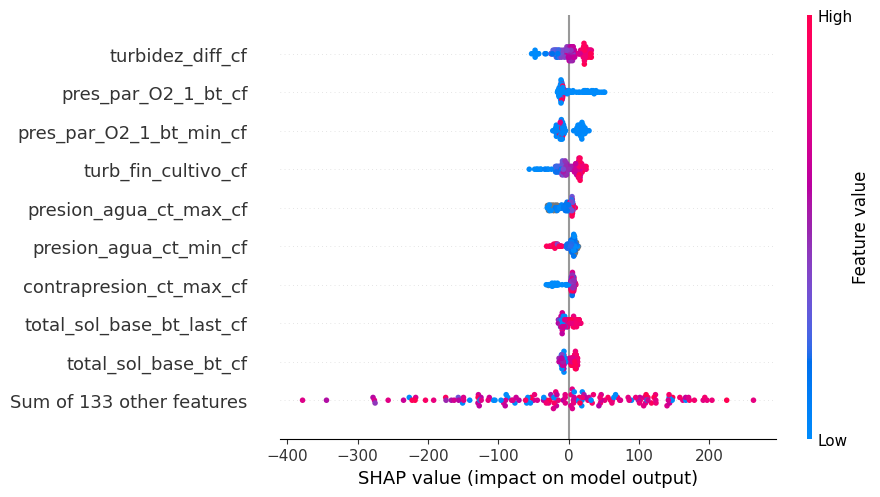

In [244]:
# shap
import shap
exp = shap_values(best_estimator, X)
shap.plots.beeswarm(exp)

In [245]:
# Get interaction values
#shap_interaction_values = shap.TreeExplainer(best_estimator).shap_interaction_values(X)
#shap.summary_plot(shap_interaction_values, X)


In [246]:
# load test
cf_test = pd.read_pickle('../../data/processed/test_mc_ino_pino_of.pkl')
cf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 169 entries, lote to h_cent_th_cf
dtypes: datetime64[ns, UTC](6), float64(156), int64(1), object(6)
memory usage: 74.1+ KB


In [247]:
cf_test = cf_test.sort_values('lote', ascending=True).reset_index(drop=True)
# Save lote
lotes = cf_test['lote']
# Drop columns
drop_cols = ['producto_2_cf','lote', 'lote_parental_cf','id_bio' , 'id_centr']
cf_test = cf_test.drop(columns=drop_cols)
# Drop product_1_cf
cf_test = cf_test.drop(columns=['producto_1_cf'])
# Drop datetime columns
cf_test = cf_test.drop(columns=cf_test.select_dtypes('datetimetz').columns)

cf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 157 entries, orden_encadenado_cf to h_cent_th_cf
dtypes: float64(154), int64(1), object(2)
memory usage: 68.8+ KB


In [248]:
# Train a model with all data
model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=8, n_estimators=50, random_state=42)
X = scale_data(X)
#X = X[features.index]
model.fit(X, y)


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=8,
                      n_estimators=50, random_state=42)

In [249]:
# Scale
cf_test = scale_data(cf_test)
# Drop columns
cf_test = cf_test[X.columns]
# Predict
y_pred = model.predict(cf_test)

# Save predictions
predictions = pd.DataFrame({'lote': lotes, 'producto_1_cf': y_pred})
# Order by lote
predictions = predictions.sort_values('lote', ascending=True).reset_index(drop=True)
# Sep | without header
predictions.to_csv('../../data/processed/universityhack.predict', sep='|', header=False, index=False)

/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/larry/.cache/pypoetry/virtualenvs/losca-RpR7jZx6-py3.11/lib/python3.11/site-pac